In [218]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import datetime
import calendar
import pdb

FNAME = 'BOS_CUN_trips1M.csv'
pd.set_option('display.max_columns', 500)

In [219]:
df = pd.read_csv(FNAME)
dt_features = ['departure', 'return', 'triptimestamp']
df[dt_features] = df[dt_features].applymap(lambda x: datetime.datetime.fromtimestamp(x))
df.head()

In [5]:
print '# of trips: {}'.format(len(df.messageid))
print '# of bundles: {}'.format(len(set(df.messageid)))

# of trips: 1202445
# of bundles: 36411


In [6]:
df.describe()

,tripindex,received,total,tax,surcharge,outbounddurationminutes,outboundstops,returndurationminutes,returnstops,availableseats,refundable,receiveddate,los2,departure_dow,return_dow,includes_sns
count,1202445.000000,1.202445e+06,1202445.000000,1202445.000000,1202445,1202445.000000,1202445.000000,1202445.000000,1202445.000000,1202445.000000,1202445,1202445.000000,1202445.000000,1202445.000000,1202445.000000,1202445.000000
mean,223.568709,1.380625e+09,674.287651,121.015507,0,452.563099,0.993710,446.177689,0.974448,4.990899,0.00658991,20130967.672225,7.439998,3.589461,3.372046,0.871928
std,799.490760,1.410096e+06,278.705025,12.248504,0,140.994934,0.378252,145.330243,0.402977,3.436925,0.0809104,49.709778,6.157269,2.194637,2.267653,0.334171
min,0.000000,1.378080e+09,320.370000,63.900000,0,261.000000,0.000000,235.000000,0.000000,-1.000000,False,20130902.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.379423e+09,471.950000,115.370000,0,385.000000,1.000000,391.000000,1.000000,2.000000,0,20130917.000000,5.000000,2.000000,1.000000,1.000000
50%,23.000000,1.380729e+09,591.370000,122.370000,0,415.000000,1.000000,418.000000,1.000000,6.000000,0,20131002.000000,7.000000,4.000000,4.000000,1.000000
75%,39.000000,1.381845e+09,793.370000,124.950000,0,495.000000,1.000000,485.000000,1.000000,9.000000,0,20131015.000000,7.000000,6.000000,6.000000,1.000000
max,7115.000000,1.383005e+09,6523.740000,487.280000,0,1700.000000,3.000000,1712.000000,3.000000,9.000000,True,20131028.000000,185.000000,6.000000,6.000000,1.000000


## check distribution of total price

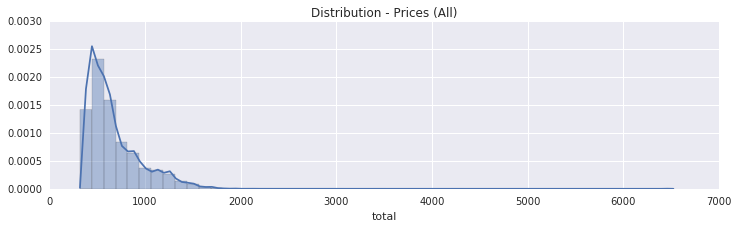

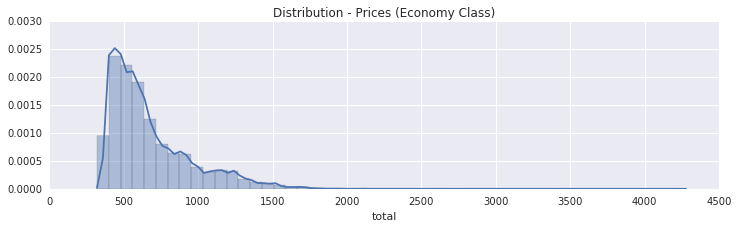

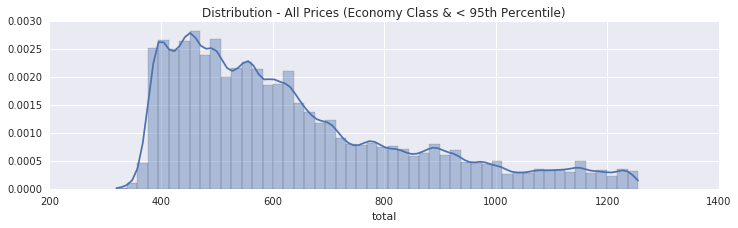

In [220]:
prices = df.total
plt.figure(1, figsize=(12, 3))
g = sns.distplot(prices)
g.set_title('Distribution - Prices (All)')

prices = df.total[df.cabinclass == 'E']
plt.figure(2, figsize=(12, 3))
g =sns.distplot(prices)
g.set_title('Distribution - Prices (Economy Class)')

prices = prices[prices < np.percentile(prices, 95)]
plt.figure(3, figsize=(12, 3))
g = sns.distplot(prices)
g.set_title('Distribution - All Prices (Economy Class & < 95th Percentile)')

In [8]:
for f in dt_features:
    print '{}, min: {}, max: {}'.format(f, df[f].min(), df[f].max())

departure, min: 2013-09-03 06:20:00, max: 2014-12-02 13:30:00
return, min: 2013-09-05 13:15:00, max: 2014-12-09 15:40:00
triptimestamp, min: 2013-09-01 20:05:32, max: 2013-10-28 19:56:38


## Datetime ranges in dataset

    Query time: 2013-09-01 to 2013-10-28
    Departure Range: 2013-09-03 to 2014-12-02
    Return Range: 2013-09-05 to 2014-12-09
**Assumes "current day" to be 2013-10-28**

In [290]:
# set global variable for minimum date in dataset
MIN_QUERY_DT = datetime.datetime(2013, 9, 1)
MAX_RETURN_DT = datetime.datetime(2014, 12, 9)
CURRENT_DATE = datetime.datetime(2013, 10, 28)
ANALYSIS_RANGE = (datetime.datetime(2013, 10, 28), datetime.datetime(2014, 10, 28))
SUBSET_ANALYSIS_RANGE = (datetime.datetime(2013, 10, 1), datetime.datetime(2014, 1, 31))

In [10]:
df.columns

Index([u'messageid', u'tripindex', u'received', u'currency', u'total', u'tax',
       u'surcharge', u'source', u'merchant', u'majorcarrierid', u'origin',
       u'destination', u'departure', u'return', u'outbounddurationminutes',
       u'outboundstops', u'returndurationminutes', u'returnstops',
       u'availableseats', u'cabinclass', u'paxtype', u'refundable',
       u'triptimestamp', u'receiveddate', u'received_odate',
       u'departure_odate', u'return_ddate', u'los2', u'departure_dow',
       u'return_dow', u'includes_sns'],
      dtype='object')

In [11]:
catgoical_features = ['currency', 'source', 'merchant', 'majorcarrierid', 'cabinclass', 'refundable',
                     'returnstops', 'outboundstops']

## Categorical Variables

In [12]:
# unique categories
for f in catgoical_features:
    uniques = set(df[f])
    print '{}: {}, {}'.format(f, len(uniques), uniques)

currency: 1, set(['USD'])
source: 2, set(['Sabre', 'Amadeus'])
merchant: 12, set(['AA', 'DL', 'NK', 'TCY', 'HR', 'FL', 'AM', 'AC', 'US', 'B6', 'LH', 'UA'])
majorcarrierid: 15, set(['AA', 'DL', 'NK', 'CM', 'HR', 'FL', 'AM', 'AC', 'US', 'B6', 'WS', 'LH', 'VX', 'UA', 'SY'])
cabinclass: 4, set(['B', 'E', 'EP', 'F'])
refundable: 2, set([False, True])
returnstops: 4, set([0, 1, 2, 3])
outboundstops: 4, set([0, 1, 2, 3])


## Clean Data
### Filter
    1. Filter for only Economy Class
    2. Filter for direct + indirect (outbound + return) with only 1 stop
    3. Filter for non-refundable
    
    4. Filter for carrierid?
    5. Filter for merchant?
    6. Filter for source?

In [292]:
_df = df[(df.cabinclass ==  'E') & (df.outboundstops < 2) & (df.returnstops < 2) & ~(df.refundable)]
print 'Removed {}% of results'.format((1 - len(_df) / float(len(df))) * 100)

Removed 12.6987097123% of results


## Feature Engineering

    1. Change dates to day, week, day of week and month
    2. Calculate difference between query time and departure time

In [293]:
dt_features

['departure', 'return', 'triptimestamp']

### 1. Change dates to day, week, day of week and month

In [294]:
import warnings
warnings.filterwarnings('ignore')
for f in dt_features:
    _df.loc[:, f + '_day'] = _df[f].map(lambda x: x.day)
    _df.loc[:, f + '_week'] = _df[f].map(lambda x: x.week)
    _df.loc[:, f + '_dayofweek'] = _df[f].map(lambda x: x.dayofweek)
    _df.loc[:, f + '_month'] = _df[f].map(lambda x: x.month)
    _df.loc[:, f + '_date'] = _df[f].map(lambda x: datetime.datetime(x.year, x.month, x.day))

### 2. Calculate difference between query time and departure time

In [295]:
timedelta1d = np.timedelta64(1, 'D')
_df.loc[:, 'dtd'] = (_df['departure'] - _df['triptimestamp']).map(lambda x: int(x / timedelta1d))

### Assuming that there are the four main variables affecting prices: 
    1. Departure Date
    2. Return Date
    3. # of Days until Departure (DTD)
    4. Length of stay (equivalent to Return Date - Departure Date)

### Two main effects:
    1. Departure/Return/Length of Stay (LOS)
    2. # of Days between Query and Departure (DTD)

*Need to check if these two effects are independent*

# Analysis

## Analysis #1: General overview of price flunctuations

In [296]:
def create_group(subset_features, by_columns, agg_funcs, _df):
    """ Create dataframe subset group based on by-columns and aggregate functons"""
    group = _df[subset_features].groupby(by=by_columns).agg(agg_funcs)
    group.columns = group.columns.get_level_values(1)
    group.reset_index(inplace=True)
    return group

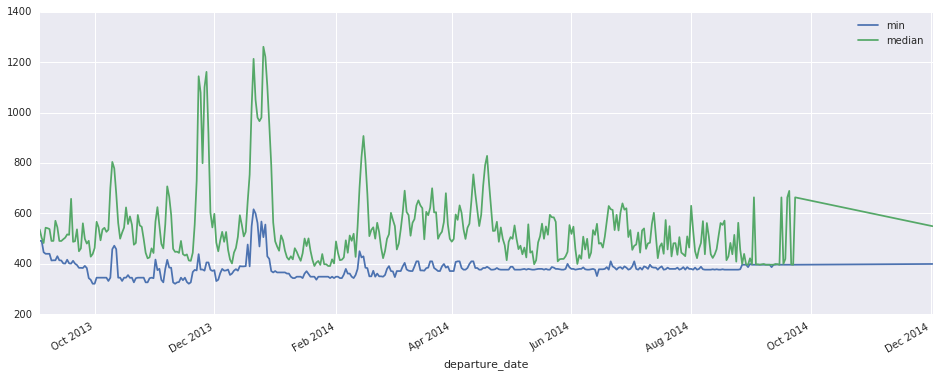

In [297]:
group = create_group(['departure_date', 'total'], ['departure_date'], 
                     ['mean', 'median', 'std', 'min', 'max', 'count'], _df)
group.plot(x='departure_date', y=['min', 'median'], figsize=(16, 6))

#### *Looking at just the minimum of each day will not show the liquidity or volume, using the median is more robust*

### Comments:

* Spikes during holiday season
* Seasonality between weeks - try to plot by day of week

## Analysis #2: Which day of the week to travel?

In [298]:
num_to_weekday = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

### Fix the Length of Stay (LOS2) variable

In [299]:
_df.los2.value_counts()[:5]

7    398385
5    131396
4    111398
6     90563
8     54743
Name: los2, dtype: int64

### Use 7-day trip to reduce return date bias

In [300]:
SPECIFIED_LOS = 7

#### *could also fix it on a specific return date instead of fixing to LOS variable*

### Grouped by departure day of week

* dark line is the focused day of week
* lighter lines are other days of the week

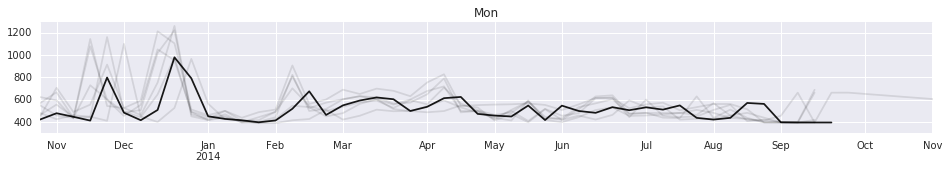

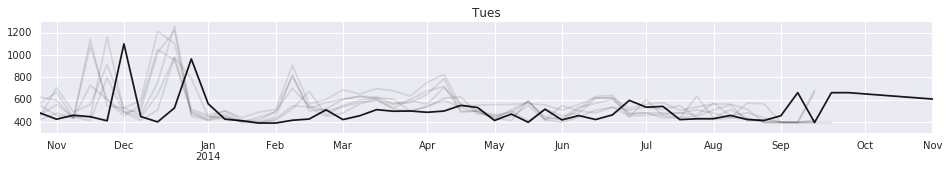

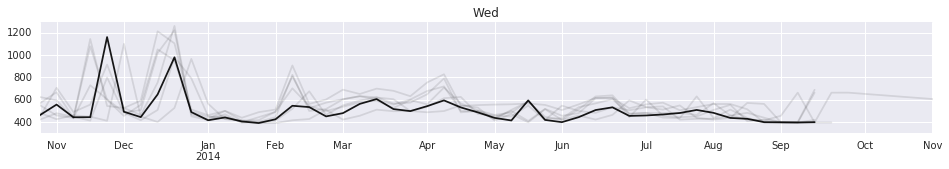

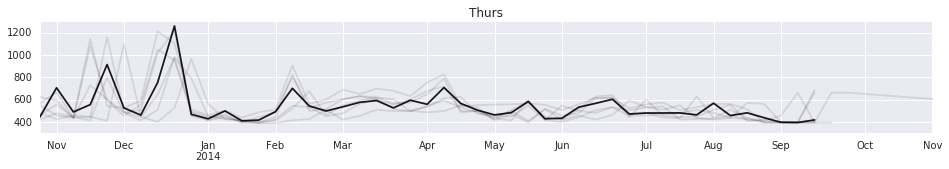

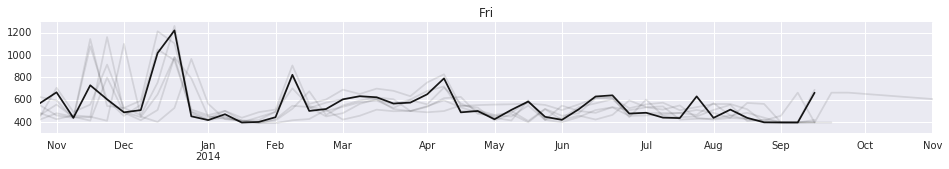

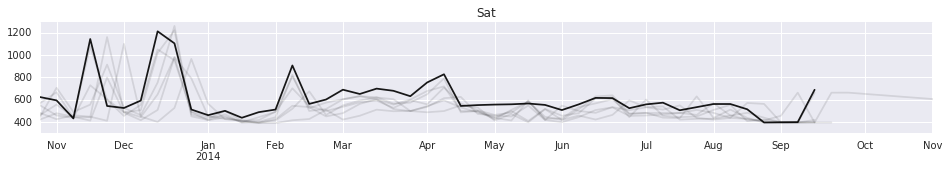

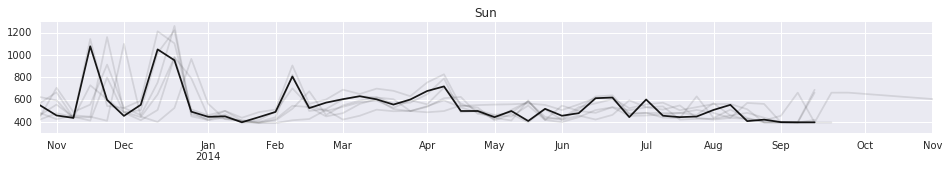

In [301]:
df_by_day = [_df[_df.departure_dayofweek == x] for x in xrange(7)]
for curr_index in xrange(7):
    ax = None
    for index, df_day in enumerate(df_by_day):
        group = create_group(['departure_date', 'total'], ['departure_date'], 
                             ['mean', 'median', 'std', 'min', 'max', 'count'], df_day)
        
        alpha = 0.9 if index == curr_index else 0.1
        if ax:
            group.plot(x='departure_date', y=['median'], figsize=(16, 2), ax=ax, alpha=alpha, color='k')
        else:
            ax = group.plot(x='departure_date', y=['median'], figsize=(16, 2), alpha=alpha, color='k')
        
    ax.set_xlabel('')
    ax.set_xlim(ANALYSIS_RANGE)
    ax.set_title(num_to_weekday[curr_index])
    ax.get_legend().set_visible(False)

### Comments:

* Day of week variation removed



### When is the best day to travel?
* Departing on Tuesday or Wednesday consistently gives the lowest prices, in some occassions at ~30% discount versus Friday + the weekend

## Analysis #3: When is the best time to travel in 2013?

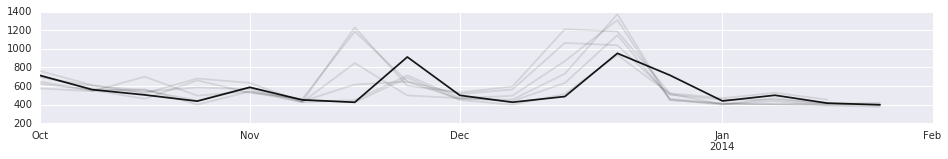

In [302]:
_df = _df[(_df.departure_date.map(lambda x: (x.year == 2013 or (x.year == 2014 and x.month == 1)))) 
          & (_df.los2 == SPECIFIED_LOS)]
df_by_day = [_df[_df.departure_dayofweek == x] for x in xrange(7)]
ax = None
for index, df_day in enumerate(df_by_day):
    group = create_group(['departure_date', 'total'], ['departure_date'], 
                         ['mean', 'median', 'std', 'min', 'max', 'count'], df_day)
    
    alpha = 0.9 if index == 0 else 0.1
    if ax:
        group.plot(x='departure_date', y='median', ax=ax, alpha=alpha, color='k')
    else:
        ax = group.plot(x='departure_date', y='median', figsize=(16, 2), alpha=alpha, color='k')

ax.set_xlabel('')
ax.set_xlim(SUBSET_ANALYSIS_RANGE)
ax.get_legend().set_visible(False)

### Comments:

* Right after Thanksgiving to early-mid December
    * Missing this opportunity mean prices are nearly two times as high!
* Departures during the last week of Decemeber is also advantageous

## Analysis 4: How far ahead to book for a specific date?

### Plots Departure Date (By day of week) vs. Days to Departure

In [25]:
def create_weekday_plots(year, month, los, figsize):
    fig, axn = plt.subplots(1, 7, sharex=False, sharey=True, figsize=figsize)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    fig.suptitle('# of Days to Departure vs. Departure Day ({})'.format(calendar.month_name[month]))
    for i, ax in enumerate(axn.flat):
        group = create_group(['departure_day', 'dtd', 'total'], ['departure_day', 'dtd'], 
                             ['mean', 'median', 'std', 'min', 'max', 'count'],
                            _df[(_df.departure_date.map(lambda x: x.year == year and x.month == month)) &
                               _df.departure_dayofweek.map(lambda x: x == i) & (_df.los2 == SPECIFIED_LOS)])

        median_price = np.median(group['median'])
        mean_price = np.mean(group['mean'])
        min_price = mean_price - 2 * np.std(group['median'])
        max_price = mean_price + 2 * np.std(group['median'])

        group = group.pivot('dtd', 'departure_day', 'median')

        g = sns.heatmap(group, vmin=min_price, vmax=max_price, cmap='RdYlGn_r', linewidths=0.1, square=True,
                       ax=ax, cbar=(i==0), cbar_ax=None if i else cbar_ax)

        g.set(xlabel='{}'.format(num_to_weekday[i]), ylabel='')
        g.invert_yaxis()

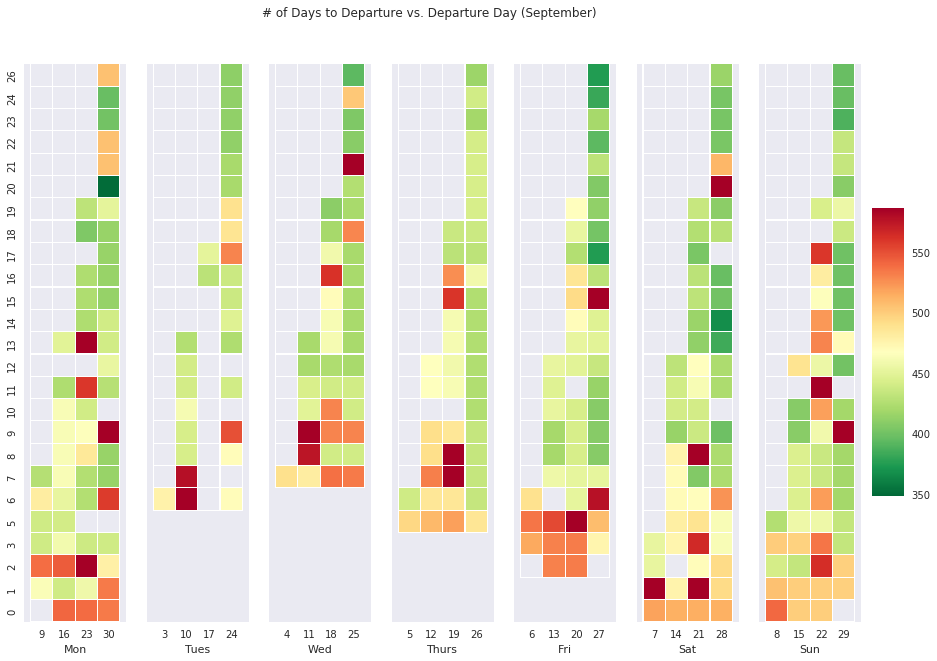

In [26]:
create_weekday_plots(2013, 9, 7, (15,10))

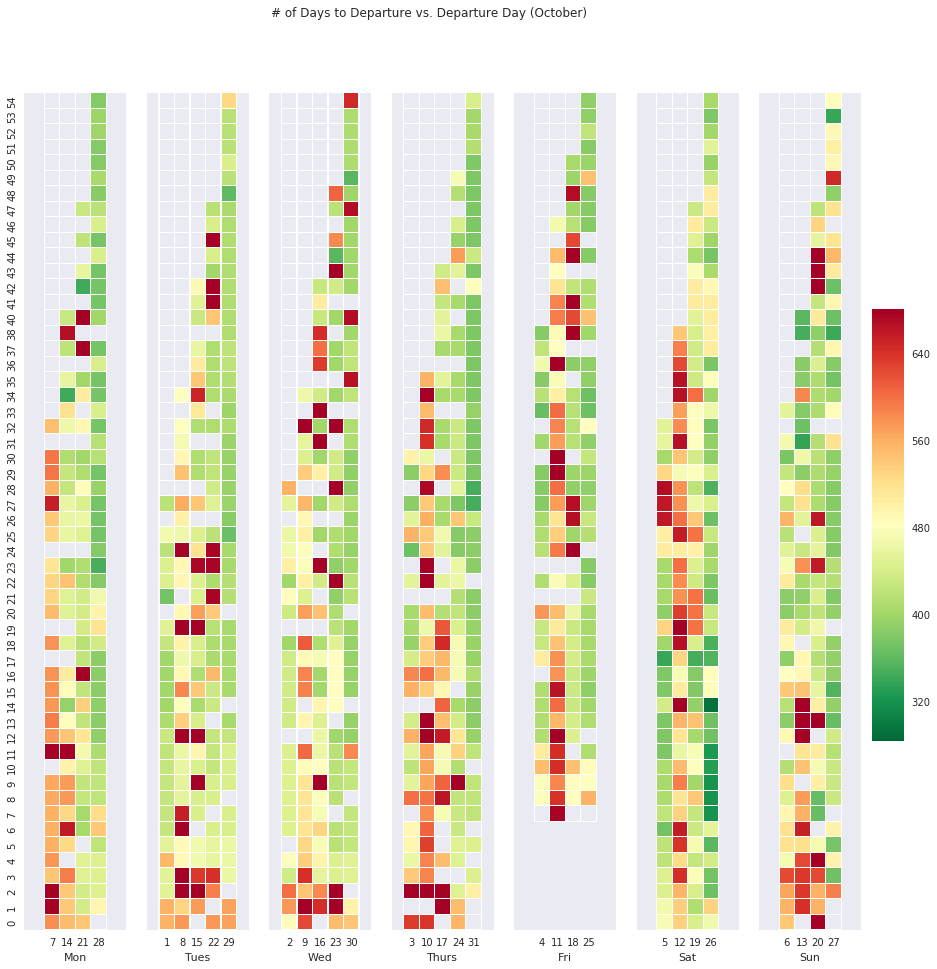

In [27]:
create_weekday_plots(2013, 10, 7, (15,15))

## Comments:

* Booking on the day of departure is expensive
* For departure days on Saturday or Sunday, booking one day before is expensive
* Given limited time, leaving on Monday is likely to yield better results.

### Proposed strategy:

* When days until departure > 1 week (non-holidays):
    * If prices increases significantly from one day ago, it's not likely to remain that way. Wait for a better deal.
    * If prices are at an acceptable level, it tends to remain that way for the next day - do not need to rush into a decision.
* When days until departure < 1 week (non-holidays):
    * Try to avoid booking on the last week - purchase even if price id average, good deals are hard to find



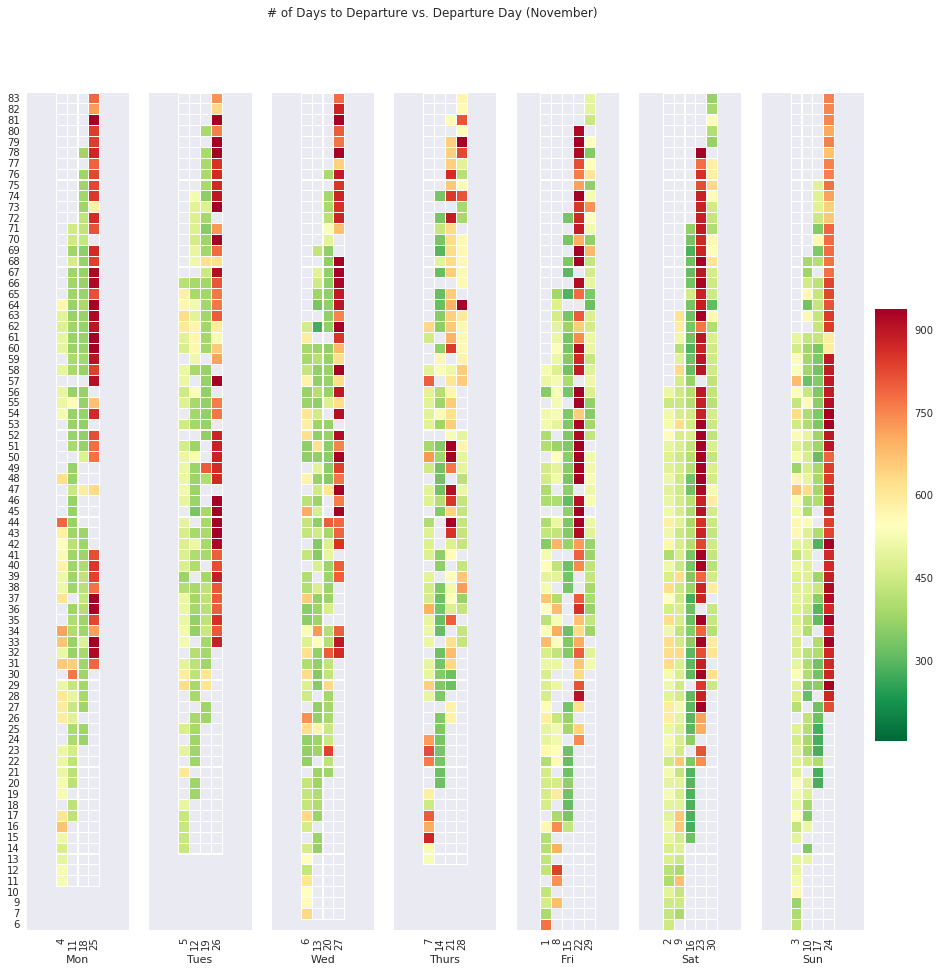

In [28]:
create_weekday_plots(2013, 11, 7, (15,15))

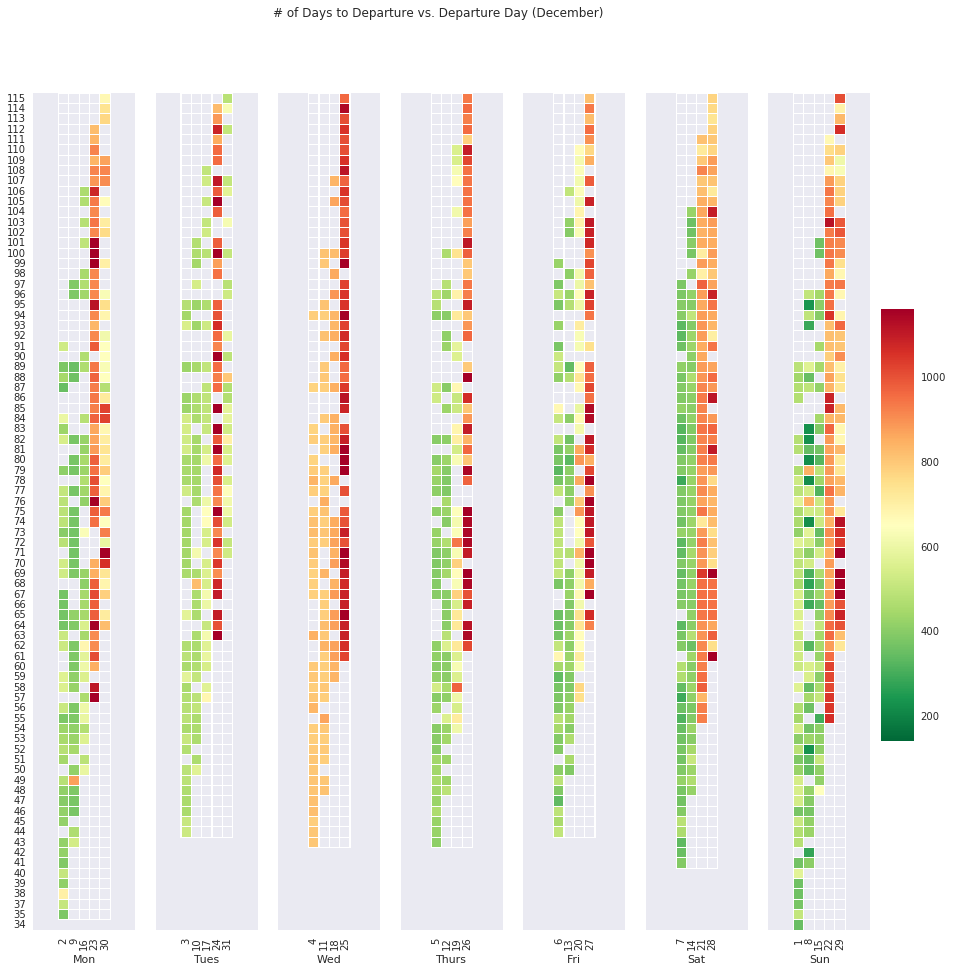

In [29]:
create_weekday_plots(2013, 12, 7, (15,15))

## Analysis #5: When to book for a specific departure date?

In [303]:
def graph_time_series_by_departure_day(year, month, day):
    time_series_group = create_time_series_departure_day(year, month, day)
    time_series_group = time_series_group.sort_values(['dtd'], ascending=[0])
    
    ax = time_series_group.plot(x='dtd', y='median', figsize=(20,6), kind='line', c='k', alpha=0.5, fontsize=16)
    moving_avg_df = moving_avg(time_series_group, days=3)
    moving_avg_df.set_index('dtd', inplace=True)
    moving_avg_df = moving_avg_df.transpose()
    ax = sns.tsplot(data=moving_avg_df.values, time=moving_avg_df.columns, alpha=0.3, ax=ax)
    ax.invert_xaxis()
    ax.set(xlabel='# Days To Departure', ylabel='Median Cost')

In [304]:
def create_time_series_departure_day(year, month, day):
    group = create_group(['departure_day', 'dtd', 'total'], ['departure_day', 'dtd'], 
                         ['mean', 'median', 'std', 'min', 'max', 'count'],
                        _df[(_df.departure_date.map(lambda x: x.year == year and x.month == month and x.day == day)) & 
                            (_df.los2 == SPECIFIED_LOS)])

    median_price = np.median(group['median'])
    return group

### Why use moving average?

* We don't want to make purchase when there is a spike in price

In [305]:
def moving_avg(group, days=3, var_days=7):
    moving_avg = []
    for x in group['dtd']:
        u = np.mean(group[(int(x + days) >= group.dtd) & (group.dtd >= int(x))]['median'])
        sigma_sq = np.var(group[(int(x + var_days) >= group.dtd) & (group.dtd >= int(x))]['median'])
        sigma = sigma_sq ** 0.5
        nstddev = 2
        margin = nstddev * sigma
        
        if np.isnan(u) or np.isnan(margin):
            continue
        moving_avg.append((x, u, u-margin, u+margin))
        
    return pd.DataFrame(moving_avg, columns=['dtd', 'mean', 'lower_bound', 'upper_bound'])

### Graph specific day: Try 2013-12-02

#### This is to quantitatively define what is considered an overprice vs. underpriced.
#### Confidence intervals for the 3-day moving average using variance from past 7 moving average data points

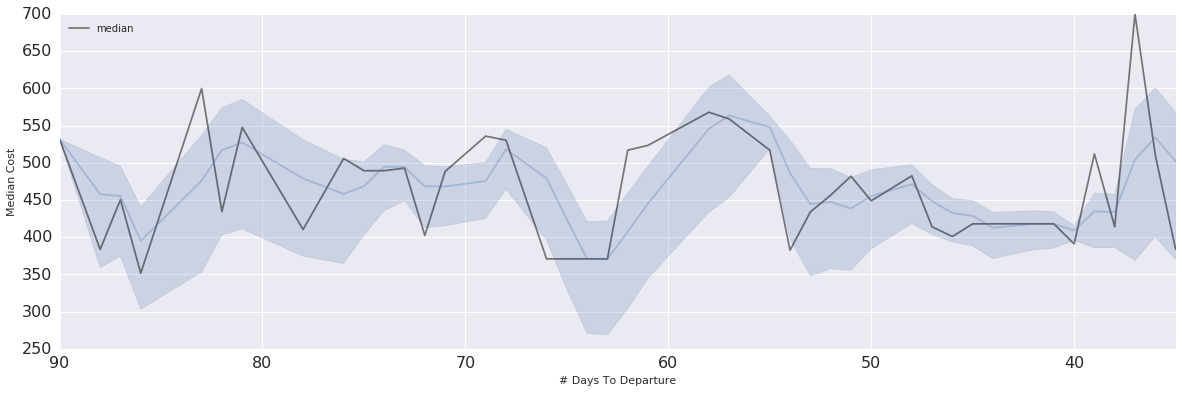

In [306]:
graph_time_series_by_departure_day(2013, 12, 2)

* Want to quantitatively define when is a good time to make a purchase using confidence intervals

### Comments:

* This shows the rationale behind the proposed strategy: Price swings occur often even booking months ahead of time. The strategy is to monitor the fluncutations and not jump into a purchase when the price spikes, it is not likely to remain expensive until the last week. Try to wait for a drop in price.